In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<BarContainer object of 10 artists>

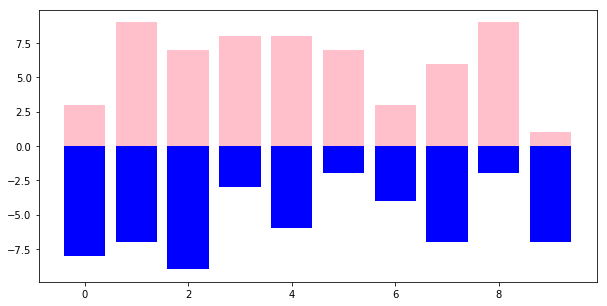

In [73]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(10),np.random.randint(1,10,size=10),color='pink')
plt.bar(np.arange(10),-np.random.randint(1,10,size=10),color='blue')

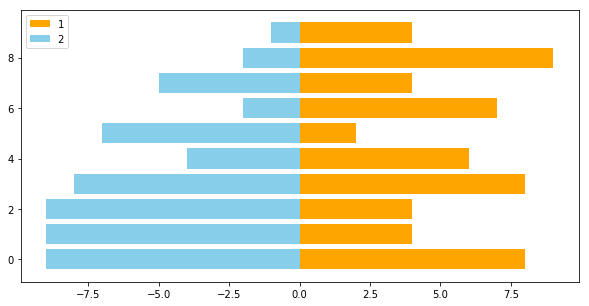

In [74]:
plt.figure(figsize=(10,5))
plt.barh(np.arange(10),np.random.randint(1,10,size=10),color='orange',label='1')
plt.barh(np.arange(10),-np.random.randint(1,10,size=10),color='skyblue',label='2')
plt.legend()

In [75]:
df = pd.read_csv('Goyang.csv',encoding='euc-kr')
df = df.replace(',','', regex=True)
df .shape

(43, 207)

In [76]:
df.head(1)

,행정구역,2019년05월_남_총인구수,2019년05월_남_연령구간인구수,2019년05월_남_0세,2019년05월_남_1세,2019년05월_남_2세,2019년05월_남_3세,2019년05월_남_4세,2019년05월_남_5세,2019년05월_남_6세,...,2019년05월_여_91세,2019년05월_여_92세,2019년05월_여_93세,2019년05월_여_94세,2019년05월_여_95세,2019년05월_여_96세,2019년05월_여_97세,2019년05월_여_98세,2019년05월_여_99세,2019년05월_여_100세 이상
0,경기도 고양시 (4128000000),513309,513309,2811,3490,3763,4333,4458,4421,4889,...,573,472,339,232,181,151,115,61,50,215


In [77]:
df.columns

Index(['행정구역', '2019년05월_남_총인구수', '2019년05월_남_연령구간인구수', '2019년05월_남_0세',
       '2019년05월_남_1세', '2019년05월_남_2세', '2019년05월_남_3세', '2019년05월_남_4세',
       '2019년05월_남_5세', '2019년05월_남_6세',
       ...
       '2019년05월_여_91세', '2019년05월_여_92세', '2019년05월_여_93세', '2019년05월_여_94세',
       '2019년05월_여_95세', '2019년05월_여_96세', '2019년05월_여_97세', '2019년05월_여_98세',
       '2019년05월_여_99세', '2019년05월_여_100세 이상'],
      dtype='object', length=207)

In [78]:
man_0='2019년05월_남_0세'
woman_0='2019년05월_여_0세'

In [79]:
max_age = 90
type(list(df.columns))
city = '경기도 고양시 일산동구'
columns = list(df.columns)
man_0_index = list(df.columns).index(man_0)
woman_0_index = list(df.columns).index(woman_0)

In [80]:
columns[man_0_index], columns[man_0_index + max_age]
columns[woman_0_index], columns[woman_0_index + max_age]

('2019년05월_여_0세', '2019년05월_여_90세')

In [81]:
data = np.array(df)
type(data)
area = data[:,0]
area[:3]
for i in range(len(area)):
    if city in area[i]:
        print(i,area[i])
        city_row_index = i
        
    


21 경기도 고양시 일산동구 (4128500000)
22 경기도 고양시 일산동구 식사동(4128551000)
23 경기도 고양시 일산동구 중산동(4128552000)
24 경기도 고양시 일산동구 정발산동(4128553000)
25 경기도 고양시 일산동구 풍산동(4128554000)
26 경기도 고양시 일산동구 백석1동(4128555100)
27 경기도 고양시 일산동구 백석2동(4128555200)
28 경기도 고양시 일산동구 마두1동(4128556000)
29 경기도 고양시 일산동구 마두2동(4128557000)
30 경기도 고양시 일산동구 장항1동(4128558000)
31 경기도 고양시 일산동구 장항2동(4128559000)
32 경기도 고양시 일산동구 고봉동(4128560000)


In [82]:
city_data = data[city_row_index]
city_man = city_data[man_0_index:man_0_index + max_age].astype(np.int)
city_woman = city_data[woman_0_index:woman_0_index + max_age].astype(np.int)
city_man.shape, city_woman.shape
type(city_man)

numpy.ndarray

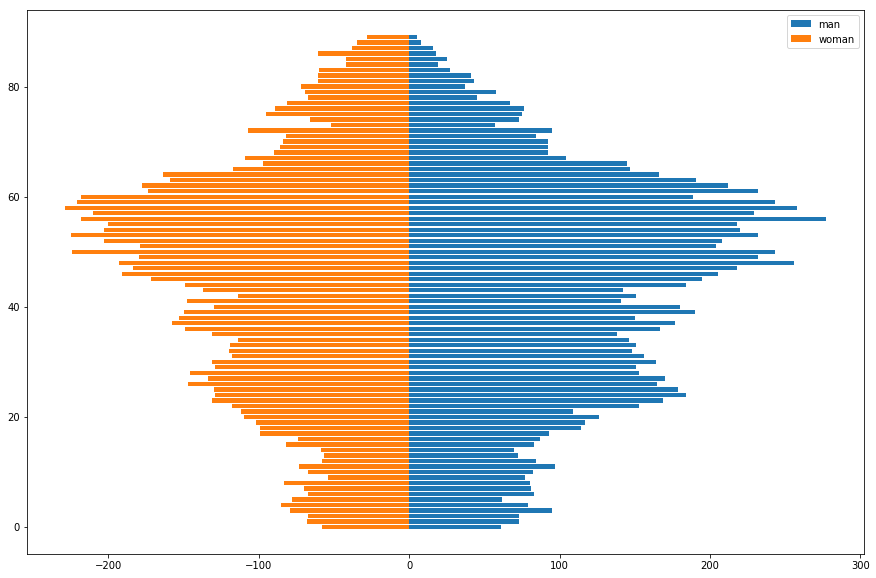

In [83]:
plt.figure(figsize=(15,10))
m = plt.barh(np.arange(len(city_man)), city_man, label='man')
m = plt.barh(np.arange(len(city_woman)), -city_woman, label='woman')
m = plt.legend()

In [84]:
np.random.randint(1,10,size=10)

array([6, 4, 8, 2, 7, 3, 5, 5, 7, 8])

In [93]:
city = '백석' # 이 글자가 들어간 행은 전부 찾자, 조건부 검색, 마스크(True만 뽑기)
is_contain =[]
for i in range(len(area)):
    is_contain.append(city in area[i])
np.mean(is_contain)
city_data = data[is_contain]
city_data.shape

(2, 207)

In [96]:
city_man = city_data[:,man_0_index:man_0_index + max_age].astype(np.int)

In [104]:


city_man = city_data[:,man_0_index:man_0_index + max_age].astype(np.int)
city_woman = city_data[:,woman_0_index:woman_0_index + max_age].astype(np.int)
city_man.shape, city_woman.shape
type(city_man)

city_man = np.sum(city_man, axis=0)
city_woman = np.sum(city_woman, axis=0)
city_man

array([159, 189, 168, 173, 189, 164, 193, 162, 164, 151, 158, 198, 190,
       226, 206, 246, 240, 283, 364, 350, 364, 416, 392, 406, 413, 448,
       430, 453, 412, 412, 415, 390, 391, 424, 361, 417, 452, 475, 436,
       432, 393, 395, 366, 377, 421, 473, 517, 518, 582, 526, 541, 453,
       452, 434, 449, 425, 473, 447, 532, 389, 351, 361, 303, 302, 285,
       209, 187, 168, 122, 136, 109, 141, 131,  83,  96, 108,  86, 111,
        73,  87,  91,  70,  62,  52,  50,  35,  30,  24,  19,  13])

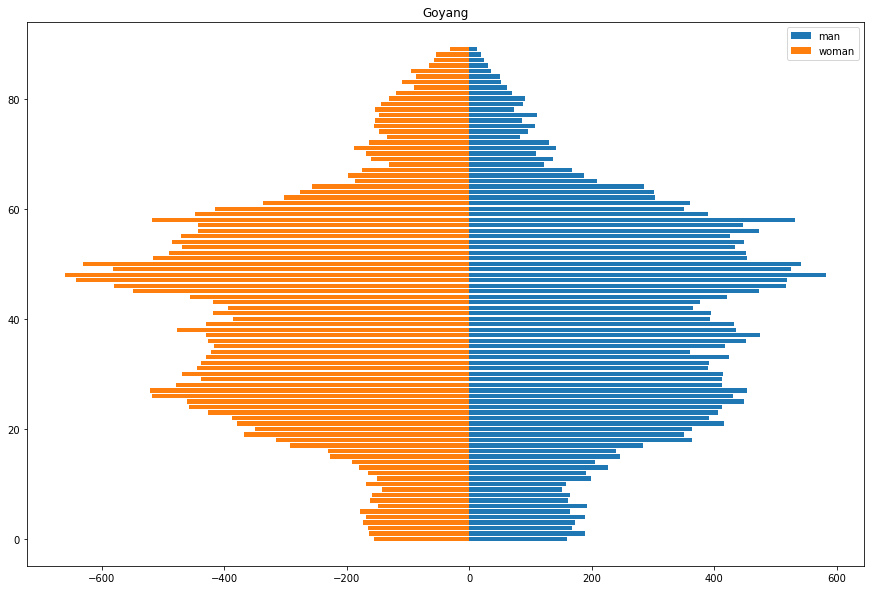

In [106]:
plt.figure(figsize=(15,10))
plt.title('Goyang')
m = plt.barh(np.arange(len(city_man)), city_man, label='man')
m = plt.barh(np.arange(len(city_woman)), -city_woman, label='woman')
m = plt.legend()

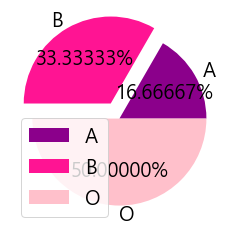

In [140]:
plt.rc('font', family='Malgun Gothic' ,size=20)
color = ['darkmagenta', 'deeppink', 'pink']
n = plt.pie([10,20,30], labels=['A','B','O'],autopct='%.5f%%', colors=color, explode =(0,0.2,0))
n = plt.legend()

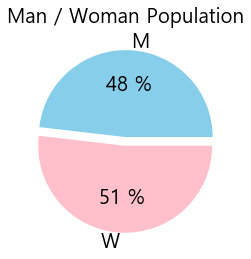

In [152]:
plt.title('Man / Woman Population' ,fontsize=20)
colors = ['skyblue','pink']
n = plt.pie([np.sum(city_man), np.sum(city_woman)], labels=['M','W'],autopct='%d %%', colors=colors, explode=(0,0.1))

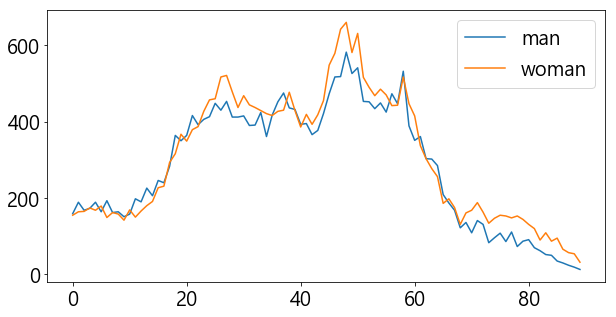

In [157]:
plt.figure(figsize=(10,5))
p = plt.plot(city_man, label='man')
p = plt.plot(city_woman, label='woman')
plt.legend()

<BarContainer object of 90 artists>

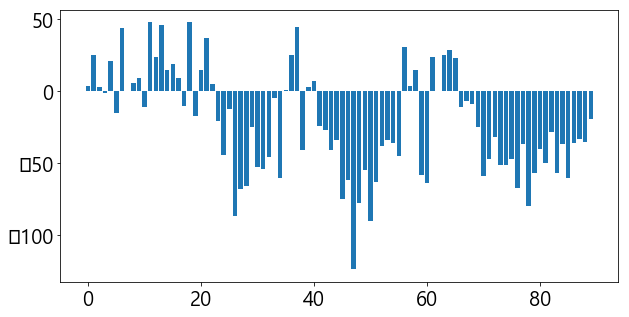

In [164]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(len(city_man)),city_man-city_woman)


# s (size) c(color)
1. plot(x) plot(x,y) 선
1. hist(x) 히스토그램
1. bar(x,y) barh(x,y) 막대그래프
1. pie(x)
1. scatter(x,y) 산점도


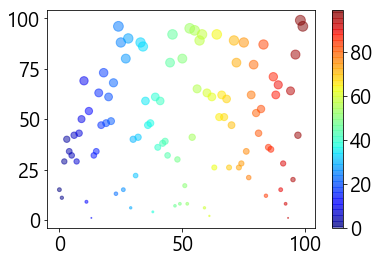

In [188]:
# s (size) c(color)
# plot(x) plot(x,y) 선
# hist(x) 히스토그램
# bar(x,y) barh(x,y) 막대그래프
# pie(x)
# scatter(x,y) 산점도

color = ['red','green', 'black','gold']
color = 'blue'
y = np.random.randint(0, 100,size=100)
#n = plt.scatter([1,2,3,4],[10,30,20,50], s=[10,2000,30,40], c=['red','green','black','gold'], cmap='jet')
n = plt.scatter(np.arange(len(y)),y, s=y, c=range(len(y)), alpha=0.5,cmap='jet')
n = plt.colorbar()


## 서울 지하철 유/무임 승차 데이터

### T-money 제공

#### 문제1. 유임승차 비율이 가장 높은 역은 어디일까?

In [193]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [219]:
df = pd.read_csv('Subway.csv', encoding='euc-kr')
df = df.replace(',','', regex=True)
df = df.dropna()
df.shape

(597, 9)

In [218]:
df.head()

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,작업일시
0,2019-05,1호선,150,서울역,1568570,1489737,247801,242107,2019-06-03 10:56:20
1,2019-05,1호선,151,시청,709821,727110,112279,112016,2019-06-03 10:56:20
2,2019-05,1호선,152,종각,1204910,1151371,176083,164915,2019-06-03 10:56:20
3,2019-05,1호선,153,종로3가,699000,647664,408682,382809,2019-06-03 10:56:20
4,2019-05,1호선,154,종로5가,561662,578374,307515,295535,2019-06-03 10:56:20


In [221]:
arr =np.array(df)
arr.shape, arr[0]


((597, 9), array(['2019-05', '1호선', 150, '서울역', '1568570', '1489737', '247801',
        '242107', '2019-06-03 10:56:20'], dtype=object))

- 유임승차 인원이 가장 많은 곳은?

In [228]:
유임승차 = (arr[:,4]).astype(np.int)
arr[np.argmax(유임승차),3], np.max(유임승차), np.argmax(유임승차), arr[np.argmax(유임승차),:]

('강남',
 2894341,
 31,
 array(['2019-05', '2호선', 222, '강남', '2894341', '2974378', '192979',
        '172755', '2019-06-03 10:56:20'], dtype=object))

유임 승차 비율이 가장 높은 곳은? 유임승차인원/무임승차인원

In [233]:
무임승차 = (arr[:,6]).astype(np.int)
유임승차비율 = 유임승차/(무임승차+1)
arr[np.argmax(유임승차비율), 1:4:2], np.max(유임승차비율), np.argmax(유임승차비율)

(array(['분당선', '복정'], dtype=object), 24.0, 237)

유무임 승하차 인원이 가장 많은 역은 어디일까?

In [250]:
전체승하차인원 = arr[:,4:8].astype(np.int)
역이용인원 = np.sum(전체승하차인원,axis=1)
arr[np.argmax(역이용인원), 1:4:2], np.max(역이용인원), np.argmax(역이용인원)

(array(['2호선', '강남'], dtype=object), 6234453, 31)

모든 역의 유무임 승하차 비율은 어떻게 될까? > 파이 (유임승차 45%, 무임하차 x%)
[유임승차인원:x, 유임 하차인원 : y, 무임 승차 : z, 무임하차 : k]

In [255]:
df.columns

Index(['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차', '작업일시'], dtype='object')

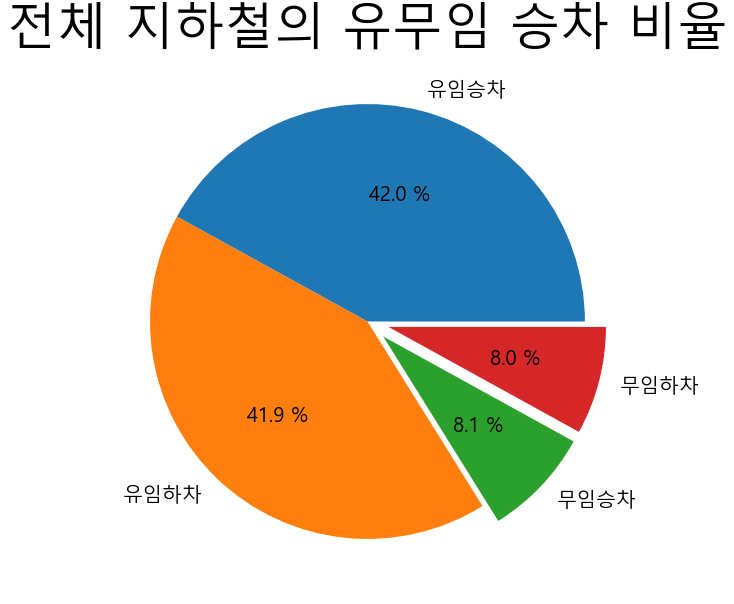

In [284]:
plt.figure(figsize=(20,10))
plt.title('전체 지하철의 유무임 승차 비율', fontsize=50)
a = np.sum(arr[:,4:8].astype(np.int),axis=0)
n = plt.pie(a, labels=df.columns[4:8], autopct='%.1f %%', explode=[0,0,0.1,0.1])
plt.savefig('지하철.png')

모든 역마다 유무임 승차 비율을 따로 파이 차트로 나타내기
- 50만명 이상 승차하는 곳만

In [302]:
plt.figure(figsize=(20,10))

for i in range(len(arr)):
    row = arr[i]
    승하차인원 = row[4:8].astype(np.int)
    유임승차 = 승하차인원[0]
    if 유임승차>1000000:
        print(row)
        
        n = plt.pie(row[4:8], labels=df.columns[4:8], autopct='%.1f %%', explode=[0,0,0.1,0.1])
        역이름 = row[3]
        파일명 = 'subway_' + 역이름 + '.png'
        plt.title(역이름+' 지하철의 유무임 승차 비율', fontsize=30)
        plt.savefig(파일명)
        plt.close()
#a = arr[:,4:8].astype(np.int)



['2019-05' '1호선' 150 '서울역' '1568570' '1489737' '247801' '242107'
 '2019-06-03 10:56:20']
['2019-05' '1호선' 152 '종각' '1204910' '1151371' '176083' '164915'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 202 '을지로입구' '1458984' '1462646' '122625' '113191'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 212 '건대입구' '1378810' '1494957' '105074' '109681'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 214 '강변(동서울터미널)' '1310416' '1289645' '160160' '155742'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 216 '잠실(송파구청)' '2539574' '2462479' '233044' '219947'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 219 '삼성(무역센터)' '1781824' '1842623' '134802' '127716'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 220 '선릉' '1460528' '1300444' '234778' '207100'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 221 '역삼' '1269095' '1438098' '174383' '177850'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 222 '강남' '2894341' '2974378' '192979' '172755'
 '2019-06-03 10:56:20']
['2019-05' '2호선' 226 '사당' '1171893' '1316118' '229867' '219309'
 '2019-06-03 10:56:20']
['2019

출근 시간대에 사람들이 많이 타고 내리는 역은 어딜까?
 - 출근 시간대는 언제인가? 새벽~ 오전 9시
 - 상위 10개 역 : 정렬해서 큰 수 10개를 자른다(mask 로 조건부 검색)
 - 타는 역 / 내리는 역

In [315]:
df.columns
출근시간시작위치 = 4
출근시간끝위치 = 13
df0 = df.replace(',','', regex=True)
arr = np.array(df0)
arr.shape
역별승차인원 = arr[:, 출근시간시작위치: 출근시간끝위치:2]
역별하차인원 = arr[:, 1+출근시간시작위치:1+출근시간끝위치:2]
역별승차인원[0], 역별하차인원[0]

(array(['1568570', '247801', '2019-06-03 10:56:20'], dtype=object),
 array(['1489737', '242107'], dtype=object))

<BarContainer object of 2 artists>

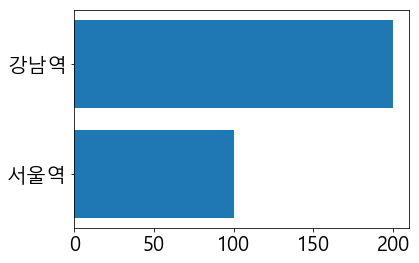

In [306]:
plt.barh(['서울역','강남역'], [100,200])